# Viz HiC interactions

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cooltools

In [6]:
file = "/vf/users/Phillippy/projects/giraffeT2T/assembly/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet_polishing/hic/giraffev0.1.1_mat.1000000.mcool::resolutions/1000000"

In [7]:
clr = cooler.Cooler(file)
clr = cooler.Cooler(file)
### to print chromosomes and binsize for this cooler
print(f'chromosomes: {clr.chromnames}, binsize: {clr.binsize}')


chromosomes: ['chr1_mat', 'chr2_mat', 'chr3_mat', 'chr4_mat', 'chr5_mat', 'chr6_mat', 'chr7_mat', 'chr8_mat', 'chr9_mat', 'chr10_mat', 'chr11_mat', 'chr12_mat', 'chr13_mat', 'chr14_mat', 'chrX_mat', 'chr1_mat_random_utig4-1240', 'chr1_mat_random_utig4-1722', 'chr1_mat_random_utig4-2544', 'chr1_mat_random_utig4-256', 'chr1_mat_random_utig4-257', 'chr1_mat_random_utig4-530', 'chr1_mat_random_utig4-531', 'chr1_mat_random_utig4-618', 'chr1_mat_random_utig4-619', 'chr1_mat_random_utig4-620', 'chr1_mat_random_utig4-621', 'chr1_mat_random_utig4-622', 'chr1_mat_random_utig4-623', 'chr4_mat_random_utig4-113', 'chr5_mat_random_utig4-2318', 'chr7_mat_random_utig4-2499', 'chr7_mat_random_utig4-268', 'chr7_mat_random_utig4-45', 'chr7_mat_random_utig4-46', 'chr7_mat_random_utig4-47', 'chr7_mat_random_utig4-48', 'chr7_mat_random_utig4-50', 'chr8_mat_random_utig4-1716', 'chr8_mat_random_utig4-1717', 'chr8_mat_random_utig4-1755', 'chr8_mat_random_utig4-1973', 'chr8_mat_random_utig4-2417', 'chr8_mat_ran

In [8]:
chromstarts = []
for i in clr.chromnames:
        chromstarts.append(clr.extent(i)[0])

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

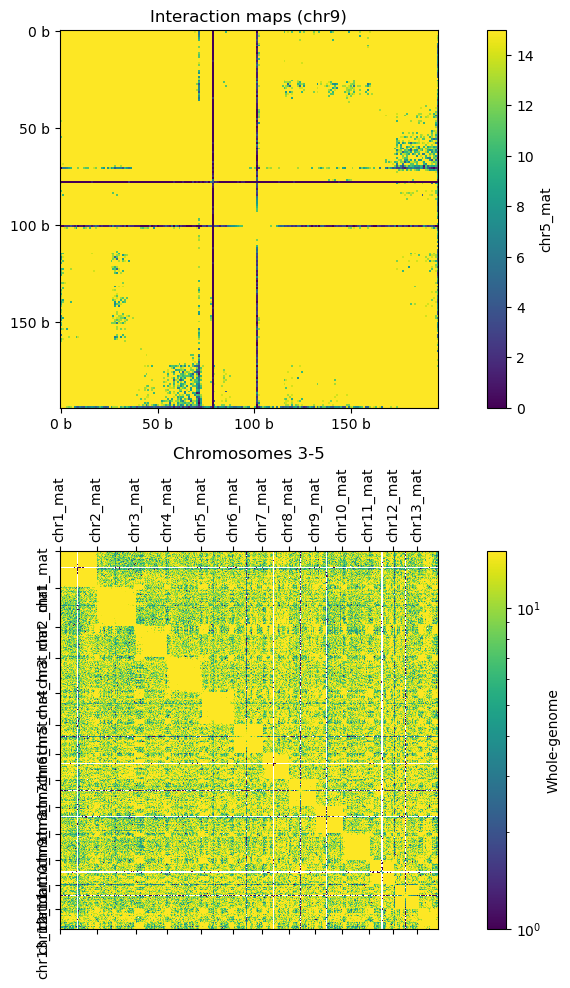

In [36]:
chrom_start, chrom_end = clr.chromnames.index('chr1_mat'), clr.chromnames.index('chr14_mat')
start, end = chromstarts[chrom_start], chromstarts[chrom_end]

vmax = 15
norm = LogNorm(vmin=1, vmax=vmax)

f, axs = plt.subplots(
    figsize=(13, 10),
    nrows=2,
    ncols=1,
    sharex=False, sharey=False)

ax = axs[0]
ax.set_title('Interaction maps (chr9)')
im = ax.matshow(clr.matrix(balance=False).fetch('chr5_mat'), vmax=vmax);
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='chr5_mat');

ax = axs[1]
ax.set_title('Chromosomes 3-5')
im = ax.matshow(clr.matrix(balance=False)[start:end, start:end], norm=norm);
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='Whole-genome');
ax.set_xticks(np.array(chromstarts[chrom_start:chrom_end])-start, clr.chromnames[chrom_start:chrom_end], rotation=90);
ax.set_yticks(np.array(chromstarts[chrom_start:chrom_end])-start, clr.chromnames[chrom_start:chrom_end], rotation=90);

format_ticks(axs[0], rotate=False)

plt.tight_layout()

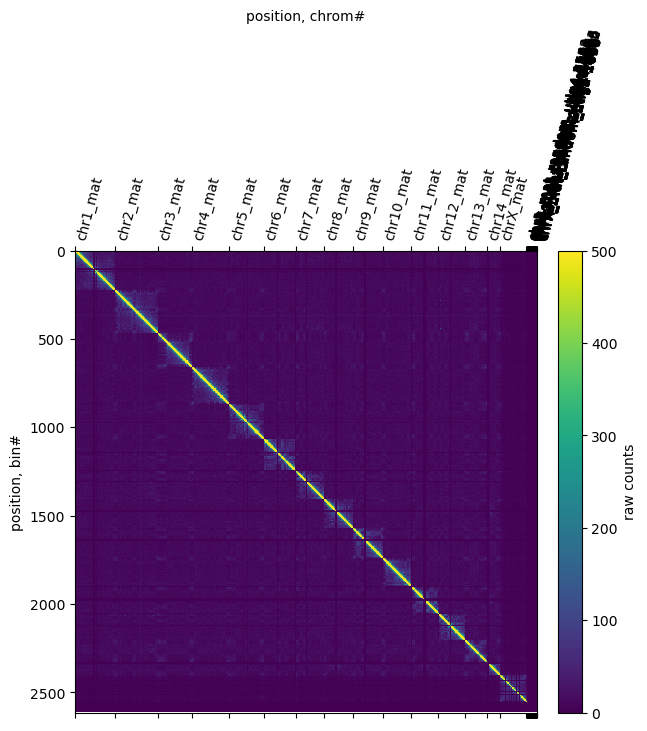

In [19]:
fig, ax = plt.subplots(figsize=(7, 6))
im = ax.matshow((clr.matrix(balance=False)[:]), vmax=500)
plt.colorbar(im, fraction=0.046, pad=0.04, label='raw counts')

# Set axis labels and ticks
ax.set(
    xticks=chromstarts,
    xticklabels=clr.chromnames,
    xlabel='position, chrom#',
    ylabel='position, bin#'
)
ax.xaxis.set_label_position('top')

# Set y-axis tick rotation and alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='left')

plt.show()


In [37]:
chr_detail = 'chr9_mat'
start, end = 40_000_000, 80_000_000

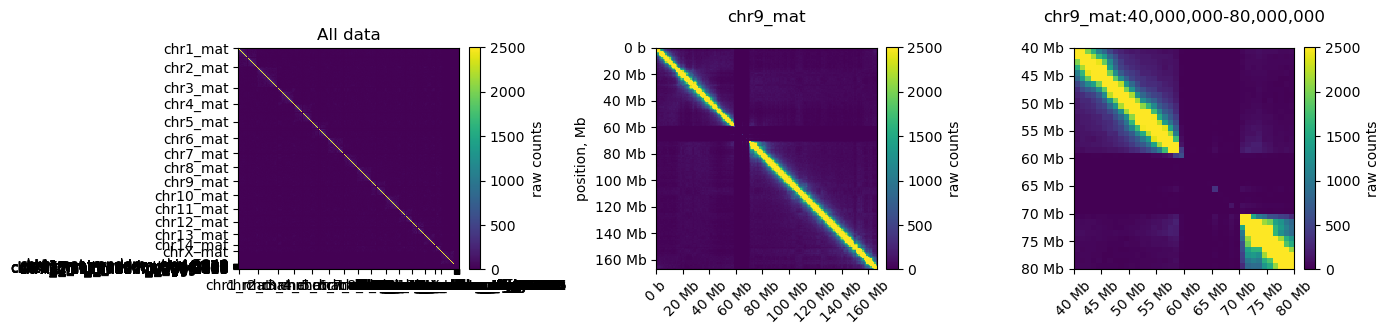

In [38]:
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

f, axs = plt.subplots(
    figsize=(14,4),
    ncols=3)

ax = axs[0]
im = ax.matshow(clr.matrix(balance=False)[:], vmax=2500);
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set_xticks(chromstarts)
ax.set_xticklabels(clr.chromnames)
ax.set_yticks(chromstarts)
ax.set_yticklabels(clr.chromnames)
ax.xaxis.tick_bottom()
ax.set_title('All chromosomes')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='left')

ax = axs[1]
im = ax.matshow(
    clr.matrix(balance=False).fetch(chr_detail),
    vmax=2500,
    extent=(0,clr.chromsizes[chr_detail], clr.chromsizes[chr_detail], 0)
);
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set_title(chr_detail, y=1.08)
ax.set_ylabel('position, Mb')
format_ticks(ax)

ax = axs[2]
# start, end = 30_000_000, 60_000_000
region = (chr_detail, start, end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region),
    vmax=2500,
    extent=(start, end, end, start)
);
ax.set_title(f'{chr_detail}:{start:,}-{end:,}', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
format_ticks(ax)
plt.tight_layout()

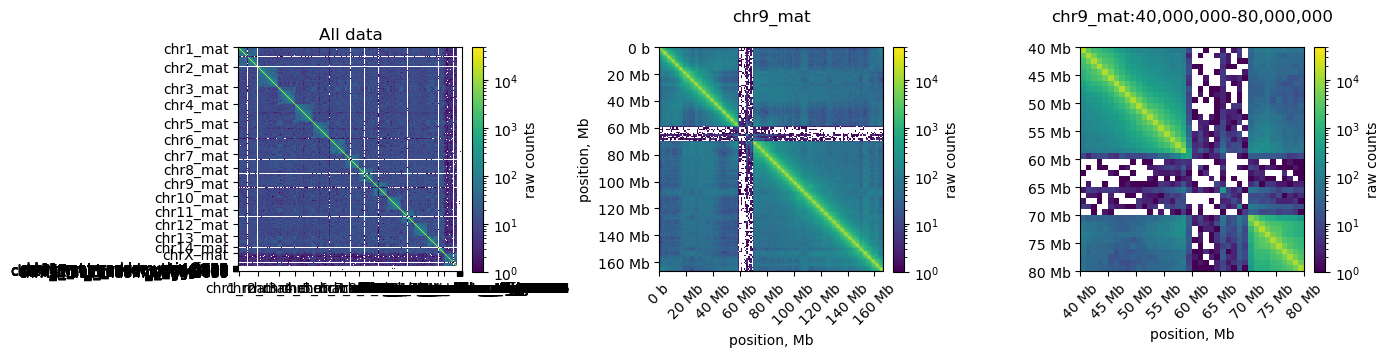

In [39]:
from matplotlib.colors import LogNorm

f, axs = plt.subplots(
    figsize=(14,4),
    ncols=3)
bp_formatter = EngFormatter('b')
norm = LogNorm(vmax=50_000)

ax = axs[0]
im = ax.matshow(
    clr.matrix(balance=False)[:],
    norm=norm,
)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set_xticks(chromstarts)
ax.set_xticklabels(clr.chromnames)
ax.set_yticks(chromstarts)
ax.set_yticklabels(clr.chromnames)
ax.xaxis.tick_bottom()
ax.set_title('All chromosomes')


ax = axs[1]
im = ax.matshow(
    clr.matrix(balance=False).fetch(chr_detail),
    norm=norm,
    extent=(0,clr.chromsizes[chr_detail], clr.chromsizes[chr_detail], 0)
);
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set_title(chr_detail, y=1.08)
ax.set(ylabel='position, Mb', xlabel='position, Mb')
format_ticks(ax)

ax = axs[2]
# start, end = 30_000_000, 60_000_000
region = (chr_detail, start, end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region),
    norm=norm,
    extent=(start, end, end, start)
);
ax.set_title(f'{chr_detail}:{start:,}-{end:,}', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set(xlabel='position, Mb')
format_ticks(ax)
plt.tight_layout()